Step 1: Set up environment:

In [1]:
#import FABlib Library
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()

In [2]:
#create slice
slice = fablib.new_slice(name="project")

#define the sites
site1='LOSA'
site2='SALT'
site3='TACC'
site4='WASH'
site5='SEAT'
site6='EDC'

print (f'the selected sites are {site1}, {site2}, {site3}, {site4}, {site5}, {site6}')

the selected sites are LOSA, SALT, TACC, WASH, SEAT, EDC


Step 2: Set up the topology:

In [3]:
sender = slice.add_node(name="sender",
                        site = site1,
                        cores = 4,
                        ram = 8,
                        disk = 20,
                        image = 'default_ubuntu_20')

receiver = slice.add_node(name="receiver",
                        site = site4,
                        cores = 4,
                        ram = 8,
                        disk = 20,
                        image = 'default_ubuntu_20')

#add interfaces:
sender_iface1 = sender.add_component(model='NIC_Basic', name='senderToS1').get_interfaces()[0]
sender_iface2 = sender.add_component(model='NIC_Basic', name='senderToS3').get_interfaces()[0]
receiver_iface1 = receiver.add_component(model='NIC_Basic', name='s2ToReceiver').get_interfaces()[0]
receiver_iface2 = receiver.add_component(model='NIC_Basic', name='s4ToReceiver').get_interfaces()[0]
receiver_iface3 = receiver.add_component(model='NIC_Basic', name='s5ToReceiver').get_interfaces()[0]

In [4]:
#create the nodes:
s1 = slice.add_node(name="s1",
                    site= site3,
                    cores=32,
                    ram=16,
                    disk=40,
                    image = 'default_ubuntu_20')

#add ifaces to the node
s1_iface1= s1.add_component(model='NIC_Basic', name = 'net1_nic').get_interfaces()[0]
s1_iface2= s1.add_component(model='NIC_Basic', name = 'net2_nic').get_interfaces()[0]

s2 = slice.add_node(name="s2",
                    site= site5,
                    cores=32,
                    ram=16,
                    disk=40,
                    image = 'default_ubuntu_20')

#add ifaces to the node
s2_iface1= s2.add_component(model='NIC_Basic', name = 'net1_nic').get_interfaces()[0]
s2_iface2= s2.add_component(model='NIC_Basic', name = 'net2_nic').get_interfaces()[0]

s3 = slice.add_node(name="s3",
                    site= site2,
                    cores=32,
                    ram=16,
                    disk=40,
                    image = 'default_ubuntu_20')

#add ifaces to the node
s3_iface1= s3.add_component(model='NIC_Basic', name = 'net1_nic').get_interfaces()[0]
s3_iface2= s3.add_component(model='NIC_Basic', name = 'net2_nic').get_interfaces()[0]
s3_iface3= s3.add_component(model='NIC_Basic', name = 'net3_nic').get_interfaces()[0]

s4 = slice.add_node(name="s4",
                    site= site6,
                    cores=32,
                    ram=16,
                    disk=40,
                    image = 'default_ubuntu_20')

#add ifaces to the node
s4_iface1= s4.add_component(model='NIC_Basic', name = 'net1_nic').get_interfaces()[0]
s4_iface2= s4.add_component(model='NIC_Basic', name = 'net2_nic').get_interfaces()[0]

s5 = slice.add_node(name="s5",
                    site= site6,
                    cores=32,
                    ram=16,
                    disk=40,
                    image = 'default_ubuntu_20')

#add ifaces to the node
s5_iface1= s5.add_component(model='NIC_Basic', name = 'net1_nic').get_interfaces()[0]
s5_iface2= s5.add_component(model='NIC_Basic', name = 'net2_nic').get_interfaces()[0]

Connecting the sites:

In [5]:
#longer path (sender->s1->s2->receiver)
net1 = slice.add_l2network(name='net1', interfaces=[sender_iface1, s1_iface1])
net2 = slice.add_l2network(name='net2', interfaces=[s1_iface2, s2_iface1])
net3 = slice.add_l2network(name='net3', interfaces=[s2_iface2, receiver_iface1])

#shorter path 1 (sender->s3->s4->receiver)
net4 = slice.add_l2network(name='net4', interfaces=[sender_iface2, s3_iface1])
net5 = slice.add_l2network(name='net5', interfaces=[s3_iface2, s4_iface1])
net6 = slice.add_l2network(name='net6', interfaces=[s4_iface2, receiver_iface2])

#shorter path 2 (sender->s3->s5->receiver)
net7 = slice.add_l2network(name='net8', interfaces=[s3_iface3, s5_iface1])
net8 = slice.add_l2network(name='net9', interfaces=[s5_iface2, receiver_iface3])

In [6]:
##Submit Slice Request
slice.submit();


Retry: 12, Time: 792 sec


ID,fbf1c2b5-6661-4938-85d9-7df349f5aea0
Name,project
Lease Expiration (UTC),2024-05-03 12:40:19 +0000
Lease Start (UTC),2024-05-02 12:40:20 +0000
Project ID,6ce270de-788d-4e07-8bae-3206860a6387
State,StableOK


ID,Name,Cores,RAM,Disk,Image,Image Type,Host,Site,Username,Management IP,State,Error,SSH Command,Public SSH Key File,Private SSH Key File
f1c217a8-92fb-4529-a21b-6ae17e75c900,receiver,4,8,100,default_ubuntu_20,qcow2,wash-w3.fabric-testbed.net,WASH,ubuntu,2001:400:a100:3020:f816:3eff:fec7:3dc5,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3020:f816:3eff:fec7:3dc5,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
3f7d6e9c-de88-4db9-b703-4166eb83e7e0,s1,32,16,100,default_ubuntu_20,qcow2,tacc-w3.fabric-testbed.net,TACC,ubuntu,129.114.110.89,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@129.114.110.89,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
cc965e32-b00b-4466-b9c0-4f5fbafabbdc,s2,32,16,100,default_ubuntu_20,qcow2,seat-w2.fabric-testbed.net,SEAT,ubuntu,2001:400:a100:3080:f816:3eff:fe37:aaac,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3080:f816:3eff:fe37:aaac,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
78242928-3820-44a3-bfbf-1ea095d63183,s3,32,16,100,default_ubuntu_20,qcow2,salt-w1.fabric-testbed.net,SALT,ubuntu,2001:400:a100:3010:f816:3eff:fe7b:a315,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3010:f816:3eff:fe7b:a315,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
d208fb7b-14b7-40ae-aaa5-7cf60b48153d,s4,32,16,100,default_ubuntu_20,qcow2,edc-w1.fabric-testbed.net,EDC,ubuntu,2620:0:c80:1003:f816:3eff:fe5d:9675,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2620:0:c80:1003:f816:3eff:fe5d:9675,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
743e7e27-5a33-4d35-aaff-e55c0e83d775,s5,32,16,100,default_ubuntu_20,qcow2,edc-w1.fabric-testbed.net,EDC,ubuntu,2620:0:c80:1003:f816:3eff:fe7b:a078,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2620:0:c80:1003:f816:3eff:fe7b:a078,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key
5c22c304-9426-496b-abc5-c6512d1c4da9,sender,4,8,100,default_ubuntu_20,qcow2,losa-w3.fabric-testbed.net,LOSA,ubuntu,2001:400:a100:3070:f816:3eff:fedd:8df9,Active,,ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3070:f816:3eff:fedd:8df9,/home/fabric/work/fabric_config/slice_key.pub,/home/fabric/work/fabric_config/slice_key


ID,Name,Layer,Type,Site,Subnet,Gateway,State,Error
efd4fbb4-36d0-46ac-a78f-01b80d96c12a,net1,L2,L2STS,None,None,None,Active,
c5115d30-67c8-41d8-919c-bf5961eb48b5,net2,L2,L2STS,None,None,None,Active,
326af24b-4251-447d-b3f9-4bcd7c59b105,net3,L2,L2STS,None,None,None,Active,
da19f4d0-a327-4773-9f58-9d840b66ec16,net4,L2,L2STS,None,None,None,Active,
0f915f8f-f225-427d-b7b5-d7cca2230f3a,net5,L2,L2STS,None,None,None,Active,
c9a594ab-cdbc-423c-b643-dc31e0418d7b,net6,L2,L2STS,None,None,None,Active,
6580d00c-6a7a-44cd-9cee-e6626950b309,net8,L2,L2STS,None,None,None,Active,
05c2404e-aee1-4e84-9359-1432fb2f5104,net9,L2,L2STS,None,None,None,Active,


Name,Short Name,Node,Network,Bandwidth,Mode,VLAN,MAC,Physical Device,Device,IP Address,Numa Node
sender-senderToS3-p1,p1,sender,net4,100,config,,1E:EB:BC:0E:E0:A9,enp6s0,enp6s0,None,4
sender-senderToS1-p1,p1,sender,net1,100,config,,22:BB:96:4E:6C:97,enp7s0,enp7s0,None,4
receiver-s5ToReceiver-p1,p1,receiver,net9,100,config,,22:4C:BA:A6:6A:00,enp9s0,enp9s0,None,4
receiver-s2ToReceiver-p1,p1,receiver,net3,100,config,,1A:6C:1E:05:38:97,enp7s0,enp7s0,None,4
receiver-s4ToReceiver-p1,p1,receiver,net6,100,config,,1E:EF:23:53:AB:F7,enp8s0,enp8s0,None,4
s1-net2_nic-p1,p1,s1,net2,100,config,,06:FF:D7:EC:60:10,enp7s0,enp7s0,None,4
s1-net1_nic-p1,p1,s1,net1,100,config,,0A:20:4D:BB:25:CE,enp8s0,enp8s0,None,4
s2-net2_nic-p1,p1,s2,net3,100,config,,12:69:10:AF:B9:9C,enp8s0,enp8s0,None,4
s2-net1_nic-p1,p1,s2,net2,100,config,,0E:B5:34:BD:5E:7B,enp7s0,enp7s0,None,4
s3-net3_nic-p1,p1,s3,net8,100,config,,06:D4:16:2C:10:10,enp9s0,enp9s0,None,6



Time to print interfaces 819 seconds


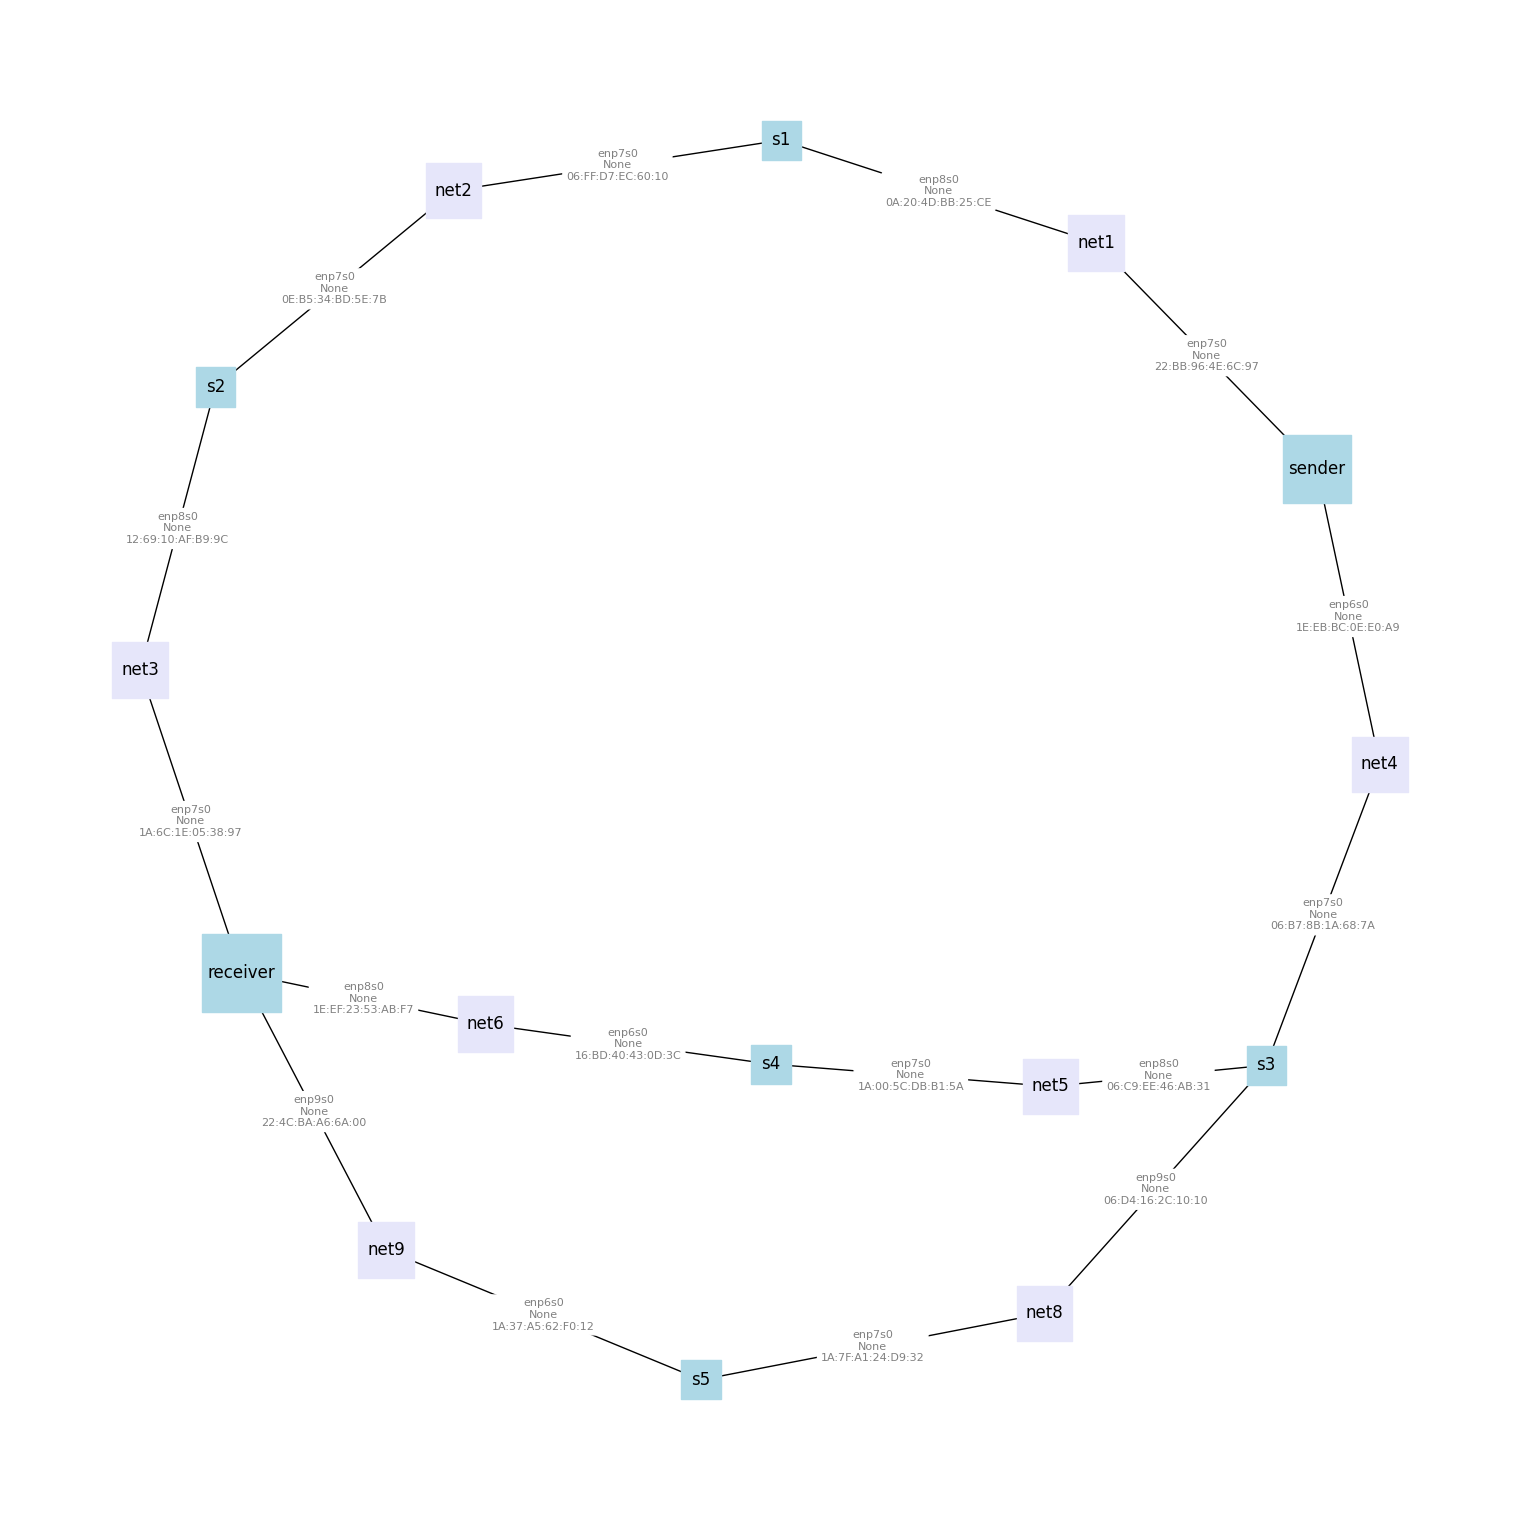

In [7]:
#print topology:
l2_nets = [(n.get_name(), {'color': 'lavender'}) for n in slice.get_l2networks() ]
l3_nets = [(n.get_name(), {'color': 'pink'}) for n in slice.get_l3networks() ]
hosts   =   [(n.get_name(), {'color': 'lightblue'}) for n in slice.get_nodes()]
nodes = l2_nets + l3_nets + hosts
ifaces = [iface.toDict() for iface in slice.get_interfaces()]
edges = [(iface['network'], iface['node'], 
          {'label': iface['physical_dev'] + '\n' + iface['ip_addr'] + '\n' + iface['mac']}) for iface in ifaces]
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(len(nodes),len(nodes)))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_shape='s',  
        node_color=[n[1]['color'] for n in nodes], 
        node_size=[len(n[0])*400 for n in nodes],  
        with_labels=True);
nx.draw_networkx_edge_labels(G,pos,
                             edge_labels=nx.get_edge_attributes(G,'label'),
                             font_color='gray',  font_size=8, rotate=False);

Install the packaged needed:

In [8]:
#BMv2
s1 = slice.get_node(name="s1")     
s1.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = s1.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

s2 = slice.get_node(name="s2")     
s2.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = s2.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

s3 = slice.get_node(name="s3")     
s3.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = s3.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

s4 = slice.get_node(name="s4")     
s4.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = s4.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

s5 = slice.get_node(name="s5")     
s5.upload_file('scripts/install_bmv2.sh', 'install_bmv2.sh')
stdout, stderr = s5.execute(f'chmod +x install_bmv2.sh &&  ./install_bmv2.sh',quiet=True)

# net-tools
sender = slice.get_node(name="sender")
receiver = slice.get_node(name="receiver")
stdout, stderr = sender.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = receiver.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = s1.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = s2.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = s3.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = s4.execute(f'sudo apt-get install -y net-tools', quiet=True)
stdout, stderr = s5.execute(f'sudo apt-get install -y net-tools', quiet=True)

#scapy
stdout, stderr = sender.execute(f'sudo apt-get update && sudo apt-get install -y python3-scapy', quiet=True)
stdout, stderr = receiver.execute(f'sudo apt-get update && sudo apt-get install -y python3-scapy', quiet=True)


Assign IP and MAC addresses

In [9]:
# Get the interface names 


# sender & receiver interface names
node1_iface1 = sender.get_interface(network_name='net1') 
sender_iface_name1 = node1_iface1.get_device_name()
print(f'sender_iface1: {sender_iface_name1}')

node1_iface2 = sender.get_interface(network_name='net4') 
sender_iface_name2 = node1_iface2.get_device_name()
print(f'sender_iface2: {sender_iface_name2}')

node2_iface1 = receiver.get_interface(network_name='net3') 
receiver_iface_name1 = node2_iface1.get_device_name()
print(f'receiver_iface1: {receiver_iface_name1}')

node2_iface2 = receiver.get_interface(network_name='net6') 
receiver_iface_name2 = node2_iface2.get_device_name()
print(f'receiver_iface2: {receiver_iface_name2}')

node2_iface3 = receiver.get_interface(network_name='net9') 
receiver_iface_name3 = node2_iface3.get_device_name()
print(f'receiver_iface3: {receiver_iface_name3}')

#switches interfaces
s1_iface1 = s1.get_interface(network_name='net1') 
s1_iface1_name = s1_iface1.get_device_name()
print(f's1_iface1: {s1_iface1_name}')

s1_iface2 = s1.get_interface(network_name='net2') 
s1_iface2_name = s1_iface2.get_device_name()
print(f's1_iface2: {s1_iface2_name}')

s2_iface1 = s2.get_interface(network_name='net2') 
s2_iface1_name = s2_iface1.get_device_name()
print(f's2_iface1: {s2_iface1_name}')

s2_iface2 = s2.get_interface(network_name='net3') 
s2_iface2_name = s2_iface2.get_device_name()
print(f's2_iface2: {s2_iface2_name}')

s3_iface1 = s3.get_interface(network_name='net4') 
s3_iface1_name = s3_iface1.get_device_name()
print(f's3_iface1: {s3_iface1_name}')

s3_iface2 = s3.get_interface(network_name='net8') 
s3_iface2_name = s3_iface2.get_device_name()
print(f's3_iface2: {s3_iface2_name}')

s3_iface3 = s3.get_interface(network_name='net5') 
s3_iface3_name = s3_iface3.get_device_name()
print(f's3_iface3: {s3_iface3_name}')

s4_iface1 = s4.get_interface(network_name='net5') 
s4_iface1_name = s4_iface1.get_device_name()
print(f's4_iface1: {s4_iface1_name}')

s4_iface2 = s4.get_interface(network_name='net6') 
s4_iface2_name = s4_iface2.get_device_name()
print(f's4_iface2: {s4_iface2_name}')

s5_iface1 = s5.get_interface(network_name='net8') 
s5_iface1_name = s5_iface1.get_device_name()
print(f's5_iface1: {s5_iface1_name}')

s5_iface2 = s5.get_interface(network_name='net9') 
s5_iface2_name = s5_iface2.get_device_name()
print(f's5_iface2: {s5_iface2_name}')



sender_iface1: enp7s0
sender_iface2: enp6s0
receiver_iface1: enp7s0
receiver_iface2: enp8s0
receiver_iface3: enp9s0
s1_iface1: enp8s0
s1_iface2: enp7s0
s2_iface1: enp7s0
s2_iface2: enp8s0
s3_iface1: enp7s0
s3_iface2: enp9s0
s3_iface3: enp8s0
s4_iface1: enp7s0
s4_iface2: enp6s0
s5_iface1: enp7s0
s5_iface2: enp6s0


Turning all interfaces up 

In [10]:
stdout, stderr = sender.execute(f'sudo ip link set dev {sender_iface_name1} up', quiet=True)
stdout, stderr = sender.execute(f'sudo ip link set dev {sender_iface_name2} up', quiet=True)
stdout, stderr = receiver.execute(f'sudo ip link set dev {receiver_iface_name1} up', quiet=True)
stdout, stderr = receiver.execute(f'sudo ip link set dev {receiver_iface_name2} up', quiet=True)
stdout, stderr = receiver.execute(f'sudo ip link set dev {receiver_iface_name3} up', quiet=True)
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface1_name} up', quiet=True)
stdout, stderr = s1.execute(f'sudo ip link set dev {s1_iface2_name} up', quiet=True)
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface1_name} up', quiet=True)
stdout, stderr = s2.execute(f'sudo ip link set dev {s2_iface2_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface1_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface2_name} up', quiet=True)
stdout, stderr = s3.execute(f'sudo ip link set dev {s3_iface3_name} up', quiet=True)
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface1_name} up', quiet=True)
stdout, stderr = s4.execute(f'sudo ip link set dev {s4_iface2_name} up', quiet=True)
stdout, stderr = s5.execute(f'sudo ip link set dev {s5_iface1_name} up', quiet=True)
stdout, stderr = s5.execute(f'sudo ip link set dev {s5_iface2_name} up', quiet=True)

MAC addresses 

In [11]:
sender_iface1_MAC = '00:00:00:00:00:01'
sender_iface2_MAC = '00:00:00:00:00:02'

s1_iface1_MAC = '00:00:00:00:00:03'
s1_iface2_MAC = '00:00:00:00:00:04'

s2_iface1_MAC = '00:00:00:00:00:05'
s2_iface2_MAC = '00:00:00:00:00:06'

s3_iface1_MAC = '00:00:00:00:00:07'
s3_iface2_MAC = '00:00:00:00:00:08'
s3_iface3_MAC = '00:00:00:00:00:09'

s4_iface1_MAC = '00:00:00:00:00:10'
s4_iface2_MAC = '00:00:00:00:00:11'

s5_iface1_MAC = '00:00:00:00:00:12'
s5_iface2_MAC = '00:00:00:00:00:13'

receiver_iface1_MAC = '00:00:00:00:00:14'
receiver_iface2_MAC = '00:00:00:00:00:15'
receiver_iface3_MAC = '00:00:00:00:00:16'

Configuring the IP and Mac addresses on sender_iface1 and s1_iface1

In [12]:
sender = slice.get_node(name="sender")     

sender_s1_subnet = "192.168.1.0/24"
sender_ip1 = '192.168.1.10/24'
s1_ip1 = '192.168.1.1/24'

stdout, stderr = sender.execute(f'sudo ifconfig {sender_iface_name1} {sender_ip1}')
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface1_name} {s1_ip1}')

stdout, stderr = sender.execute(f'sudo ifconfig {sender_iface_name1} hw ether {sender_iface1_MAC}')
stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface1_name} hw ether {s1_iface1_MAC}')


In [13]:
sender = slice.get_node(name="sender")     

sender_s3_subnet = "192.168.2.0/24"
sender_ip2 = '192.168.2.10/24'
s3_ip1 = '192.168.2.1/24'

stdout, stderr = sender.execute(f'sudo ifconfig {sender_iface_name2} {sender_ip2}')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface1_name} {s3_ip1}')

stdout, stderr = sender.execute(f'sudo ifconfig {sender_iface_name2} hw ether {sender_iface2_MAC}')
stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface1_name} hw ether {s3_iface1_MAC}')

In [14]:
s3 = slice.get_node(name="s3")     

s3_s5_subnet = "192.168.3.0/24"
s3_ip2 = '192.168.3.10/24'
s5_ip1 = '192.168.3.1/24'

stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface2_name} {s3_ip2}')
stdout, stderr = s5.execute(f'sudo ifconfig {s5_iface1_name} {s5_ip1}')

stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface2_name} hw ether {s3_iface2_MAC}')
stdout, stderr = s5.execute(f'sudo ifconfig {s5_iface1_name} hw ether {s5_iface1_MAC}')

In [15]:
s3 = slice.get_node(name="s3")     

s3_s4_subnet = "192.168.4.0/24"
s3_ip3 = '192.168.4.10/24'
s4_ip1 = '192.168.4.1/24'

stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface3_name} {s3_ip3}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface1_name} {s4_ip1}')

stdout, stderr = s3.execute(f'sudo ifconfig {s3_iface3_name} hw ether {s3_iface3_MAC}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface1_name} hw ether {s4_iface1_MAC}')

In [16]:
s1 = slice.get_node(name="s1")     

s1_s2_subnet = "192.168.5.0/24"
s1_ip2 = '192.168.5.10/24'
s2_ip1 = '192.168.5.1/24'

stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface2_name} {s1_ip2}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface1_name} {s2_ip1}')

stdout, stderr = s1.execute(f'sudo ifconfig {s1_iface2_name} hw ether {s1_iface2_MAC}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface1_name} hw ether {s2_iface1_MAC}')

In [17]:
receiver = slice.get_node(name="receiver")     

receiver_s2_subnet = "192.168.6.0/24"
receiver_ip1 = '192.168.6.10/24'
s2_ip2 = '192.168.6.1/24'

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name1} {receiver_ip1}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface2_name} {s2_ip2}')

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name1} hw ether {receiver_iface1_MAC}')
stdout, stderr = s2.execute(f'sudo ifconfig {s2_iface2_name} hw ether {s2_iface2_MAC}')


In [18]:
receiver = slice.get_node(name="receiver")     

receiver_s4_subnet = "192.168.7.0/24"
receiver_ip2 = '192.168.7.10/24'
s4_ip2 = '192.168.7.1/24'

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name2} {receiver_ip2}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface2_name} {s4_ip2}')

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name2} hw ether {receiver_iface2_MAC}')
stdout, stderr = s4.execute(f'sudo ifconfig {s4_iface2_name} hw ether {s4_iface2_MAC}')

In [19]:
receiver = slice.get_node(name="receiver")     

receiver_s5_subnet = "192.168.8.0/24"
receiver_ip3 = '192.168.8.10/24'
s5_ip2 = '192.168.8.1/24'

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name3} {receiver_ip3}')
stdout, stderr = s5.execute(f'sudo ifconfig {s5_iface2_name} {s5_ip2}')

stdout, stderr = receiver.execute(f'sudo ifconfig {receiver_iface_name3} hw ether {receiver_iface3_MAC}')
stdout, stderr = s5.execute(f'sudo ifconfig {s5_iface2_name} hw ether {s5_iface2_MAC}')

Configure forwarding and routing 

In [20]:
#Enable forwarding on the switch
command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = s1.execute(command, quiet=True)

command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = s2.execute(command, quiet=True)

command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = s3.execute(command, quiet=True)

command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = s4.execute(command, quiet=True)

command = 'sudo sysctl -w net.ipv4.ip_forward=1' 
stdout, stderr = s5.execute(command, quiet=True)

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)

# Get the absolute path of a directory
directory_name = 'rules1.sh'
absolute_directory_path = os.path.abspath(directory_name)

# Print the absolute path of the directory
print("Absolute directory path:", absolute_directory_path)

In [23]:
s1 = slice.get_node(name='s1')        
s1.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s1.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s1_iface1_name} -i 1@{s1_iface2_name} switch.json --log-console')
stdout, stderr = s1.execute(f'sudo p4c project/src/switch.p4')
stdout, stderr = s1.execute(f'sudo simple_switch -i 0@{s1_iface1_name} -i 1@{s1_iface2_name} switch.json &')

sudo simple_switch -i 0@enp8s0 -i 1@enp7s0 switch.json --log-console
Calling target program-options parser
Adding interface enp8s0 as port 0
Adding interface enp7s0 as port 1


In [24]:
s2 = slice.get_node(name='s2')        
s2.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s2.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s2_iface1_name} -i 1@{s2_iface2_name}  switch.json --log-console')
stdout, stderr = s2.execute(f'sudo p4c project/src/switch.p4')
stdout, stderr = s2.execute(f'sudo simple_switch -i 0@{s2_iface1_name} -i 1@{s2_iface2_name} switch.json &')

sudo simple_switch -i 0@enp7s0 -i 1@enp8s0  switch.json --log-console
Calling target program-options parser
Adding interface enp7s0 as port 0
Adding interface enp8s0 as port 1


In [136]:
s3 = slice.get_node(name='s3')        
s3.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s3.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s3_iface1_name} -i 1@{s3_iface2_name} -i 2@{s3_iface3_name} s3.json --log-console')
stdout, stderr = s3.execute(f'sudo p4c project/src/s3.p4')
stdout, stderr = s3.execute(f'sudo simple_switch -i 0@{s3_iface1_name} -i 1@{s3_iface2_name} -i 2@{s3_iface3_name} s3.json &')

sudo simple_switch -i 0@enp7s0 -i 1@enp9s0 -i 2@enp8s0 s3.json --log-console
 [--Wwarn=invalid] warning: no user metadata fields tagged with @field_list(0)
 Calling target program-options parser
Adding interface enp7s0 as port 0
Adding interface enp9s0 as port 1
Adding interface enp8s0 as port 2


In [26]:
s4 = slice.get_node(name='s4')        
s4.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s4.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s4_iface1_name} -i 1@{s4_iface2_name}  basic.json --log-console')
stdout, stderr = s4.execute(f'sudo p4c project/src/switch.p4')
stdout, stderr = s4.execute(f'sudo simple_switch -i 0@{s4_iface1_name} -i 1@{s4_iface2_name} switch.json &')

sudo simple_switch -i 0@enp7s0 -i 1@enp6s0  basic.json --log-console
Calling target program-options parser
Adding interface enp7s0 as port 0
Adding interface enp6s0 as port 1


In [27]:
s5 = slice.get_node(name='s5')        
s5.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s5.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s5_iface1_name} -i 1@{s5_iface2_name}  switch.json --log-console')
stdout, stderr = s5.execute(f'sudo p4c project/src/switch.p4')
stdout, stderr = s5.execute(f'sudo simple_switch -i 0@{s5_iface1_name} -i 1@{s5_iface2_name}  switch.json &')

sudo simple_switch -i 0@enp7s0 -i 1@enp6s0  switch.json --log-console
Calling target program-options parser
Adding interface enp7s0 as port 0
Adding interface enp6s0 as port 1


In [ ]:
stdout, stderr = s3.execute(f'sudo pkill simple_switch')
stdout, stderr = s5.execute(f'sudo p4c project/src/basic.p4')

In [ ]:
s1.get_ssh_command()

In [ ]:
s2.get_ssh_command()

In [51]:
s3.get_ssh_command()

'ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3010:f816:3eff:fe7b:a315'

In [ ]:
s4.get_ssh_command()

In [ ]:
s5.get_ssh_command()

In [ ]:
sender.get_ssh_command()

In [21]:
receiver.get_ssh_command()

'ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:400:a100:3020:f816:3eff:fec7:3dc5'

sudo su
p4c project/src/basic.p4
simple_switch -i 0@ens8 -i 1@ens7 basic.json --log-console

In [28]:
s1.upload_file('/home/fabric/work/Project/rules1.sh', 'rules1.sh')
stdout, stderr = s1.execute('chmod +x rules1.sh && ./rules1.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:01:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:01	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:06:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:05	00:01
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:05:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:05	00:01
Entry has been added with handle 2
RuntimeCmd: 


In [29]:
s2.upload_file('/home/fabric/work/Project/rules2.sh', 'rules2.sh')
stdout, stderr = s2.execute('chmod +x rules2.sh && ./rules2.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:05:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:04	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:06:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:14	00:01
Entry has been added with handle 1
RuntimeCmd: 


In [142]:
s3.upload_file('/home/fabric/work/Project/rules3.sh', 'rules3.sh')
stdout, stderr = s3.execute('chmod +x rules3.sh && ./rules3.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:02:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:02	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:04:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:10	00:02
Entry has been added with handle 1
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:03:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:12	00:01
Entry has been added with handle 2
RuntimeCmd: 
Obtaining JSON from switch...
Done
Contr

In [31]:
s4.upload_file('/home/fabric/work/Project/rules4.sh', 'rules4.sh')
stdout, stderr = s4.execute('chmod +x rules4.sh && ./rules4.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:04:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:09	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:07:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:15	00:01
Entry has been added with handle 1
RuntimeCmd: 


In [32]:
s5.upload_file('/home/fabric/work/Project/rules5.sh', 'rules5.sh')
stdout, stderr = s5.execute('chmod +x rules5.sh && ./rules5.sh')

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:03:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:08	00:00
Entry has been added with handle 0
RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: Adding entry to lpm match table MyIngress.ipv4_lpm
match key:           LPM-c0:a8:08:00/24
action:              MyIngress.forward
runtime data:        00:00:00:00:00:16	00:01
Entry has been added with handle 1
RuntimeCmd: 


In [34]:
sender.upload_directory('/home/fabric/work/Project/files', '/home/ubuntu')

'success'

In [ ]:
stdout, stderr = s4.execute(f'sudo pkill simple_switch')

In [22]:
receiver.upload_file('/home/fabric/work/Project/src/recv.py', 'recv.py')
receiver.upload_file('/home/fabric/work/Project/src/packet_number_header.py', 'packet_number_header.py')

<SFTPAttributes: [ size=476 uid=1000 gid=1000 mode=0o100664 atime=1714655478 mtime=1714655478 ]>

In [143]:
stdout, stderr = receiver.execute(f'sudo rm packet_receive_times.csv ')

In [84]:
sender.upload_file('/home/fabric/work/Project/src/recv.py', 'recv.py')

<SFTPAttributes: [ size=2281 uid=1000 gid=1000 mode=0o100664 atime=1714659655 mtime=1714659655 ]>

In [ ]:
s4 = slice.get_node(name='s4')        
s4.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s4.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s4_iface1_name} -i 1@{s4_iface2_name}  switch.json --log-console')
stdout, stderr = s4.execute(f'sudo p4c project/src/switch.p4')

In [141]:
s3 = slice.get_node(name='s3')        
s3.upload_directory('/home/fabric/work/Project/src', '/home/ubuntu/project')
stdout, stderr = s3.execute(f'sudo pkill simple_switch')
print(f'sudo simple_switch -i 0@{s3_iface1_name} -i 1@{s3_iface2_name} -i 2@{s3_iface3_name} s3.json --log-console')
stdout, stderr = s3.execute(f'sudo p4c project/src/s3.p4')

sudo simple_switch -i 0@enp7s0 -i 1@enp9s0 -i 2@enp8s0 s3.json --log-console
 [--Wwarn=invalid] warning: no user metadata fields tagged with @field_list(0)
 

In [144]:
stdout, stderr = s3.execute(f'sudo tc qdisc del dev {s3_iface3_name} root')
stdout, stderr = sender.execute(f'sudo tc qdisc del dev {sender_iface_name2} root')
# stdout, stderr = sender.execute(f'sudo tc qdisc add dev {sender_iface_name2} root tbf rate 1mbit burst 100Kbit latency 200ms')
# stdout, stderr = s3.execute(f'sudo tc qdisc add dev {s3_iface3_name} root tbf rate 100bit burst 1074 latency 10ms')
# stdout, stderr = s4.execute(f'sudo tc qdisc del dev {s4_iface1_name} root')
# stdout, stderr = s4.execute(f'sudo tc qdisc add dev {s4_iface1_name} root tbf rate 10bit burst 1 latency 100ms')
# stdout, stderr = sender.execute(f'sudo tc qdisc add dev {sender_iface_name2} root netem delay 100ms')

 Error: Cannot delete qdisc with handle of zero.
  Error: Cannot delete qdisc with handle of zero.
 

In [145]:
sender.upload_file('/home/fabric/work/Project/src/send.py', 'send.py')
sender.upload_file('/home/fabric/work/Project/src/packet_number_header.py', 'packet_number_header.py')
#server1.execute(f'sudo python3 send.py {server1_iface} 192.168.1.10 192.168.2.10 HelloWorld')
# stdout, stderr = sender.execute(f'sudo python3 send.py 192.168.7.10 message.txt')
stdout, stderr = sender.execute(f'sudo python3 send.py what_a_wonderful_world.mp3  "Louis Armstrong"')


sending on interface enp7s0 to 192.168.6.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 192.168.7.10
sending on interface enp6s0 to 1

KeyboardInterrupt: 

In [ ]:
stdout, stderr = receiver.execute(f'sudo python3 recv.py ')

In [ ]:
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
fablib = fablib_manager()
slice = fablib.get_slice(name="project")
slice.delete()